In [1]:
# %load Kmeans.py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
def display_partition(x_values,y_values,assignment_values):
    labels = []
    colors = ["red","blue","green","yellow"]
    for i in range(len(assignment_values)):
      labels.append(colors[(assignment_values[i])])
    color = labels
    df = pd.DataFrame\
            (dict(x =x_values,y = y_values ,color = labels ))
    fig, ax = plt.subplots()
    ax.scatter(df['x'], df['y'], c=df['color'])
    plt.show()

In [3]:
num_vectors = 2000
num_clusters = 4
n_samples_per_cluster = 500

num_steps = 1000
x_values = []
y_values = []
vector_values = []

In [4]:
#CREATE RANDOM DATA
for i in range(num_vectors):
  if np.random.random() > 0.5:
    x_values.append(np.random.normal(0.4, 0.7))
    y_values.append(np.random.normal(0.2, 0.8))
    
  else:
    x_values.append(np.random.normal(0.6, 0.4))
    y_values.append(np.random.normal(0.8, 0.5))
vector_values = list(zip(x_values,y_values))
vectors = tf.constant(vector_values)

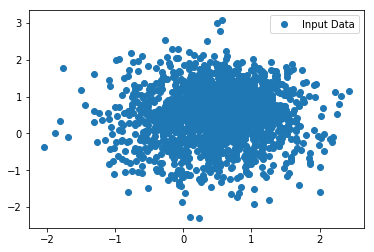

In [5]:
plt.plot(x_values, y_values, 'o', label='Input Data')
plt.legend()
plt.show()

In [6]:
n_samples = tf.shape(vectors)[0]
random_indices = tf.random_shuffle(tf.range(0, n_samples))

In [7]:
begin = [0, ]
size = [num_clusters, ]
size[0] = num_clusters

In [8]:
centroid_indices = tf.slice(random_indices, begin, size)
centroids = tf.Variable(tf.gather(vector_values, centroid_indices))

In [9]:
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)
vectors_subtraction = tf.subtract(expanded_vectors, expanded_centroids)

In [10]:
euclidean_distances = tf.reduce_sum(tf.square(vectors_subtraction), 2)
assignments = tf.to_int32(tf.argmin(euclidean_distances, 0))

In [11]:
partitions = tf.dynamic_partition(vectors, assignments, num_clusters)

In [12]:
update_centroids = tf.concat([tf.expand_dims \
                            (tf.reduce_mean(partition, 0), 0)\
                            for partition in partitions], 0)

In [13]:
init_op = tf.global_variables_initializer()

In [14]:
with tf.Session() as sess:
    sess.run(init_op)
    for step in range(num_steps):
        _, centroid_values, assigment_values = \
        sess.run([update_centroids, centroids, assignments])

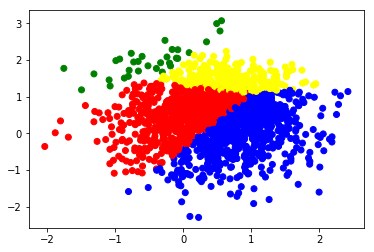

In [15]:
display_partition(x_values, y_values, assigment_values)